# matplotlib


## 2.matplotlib画图流程


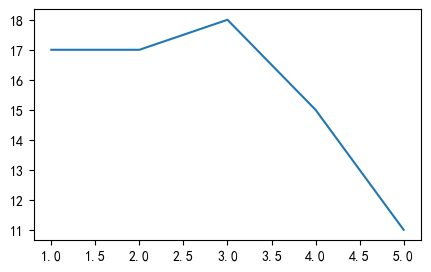

In [3]:
import matplotlib.pyplot as plt
"""创建画布，figsize：指定图的长宽，dpi图像的清晰度"""
plt.figure(figsize=(5,3),dpi=100)

"""绘制折线图，参数分别是X和Y轴"""
plt.plot([1,2,3,4,5],[17,17,18,15,11])
"""显示图像"""
plt.show()    #pyplot模块内的一个函数

### 1.2 基础绘图功能（以折线图为例）  在一张图里面绘制多个y

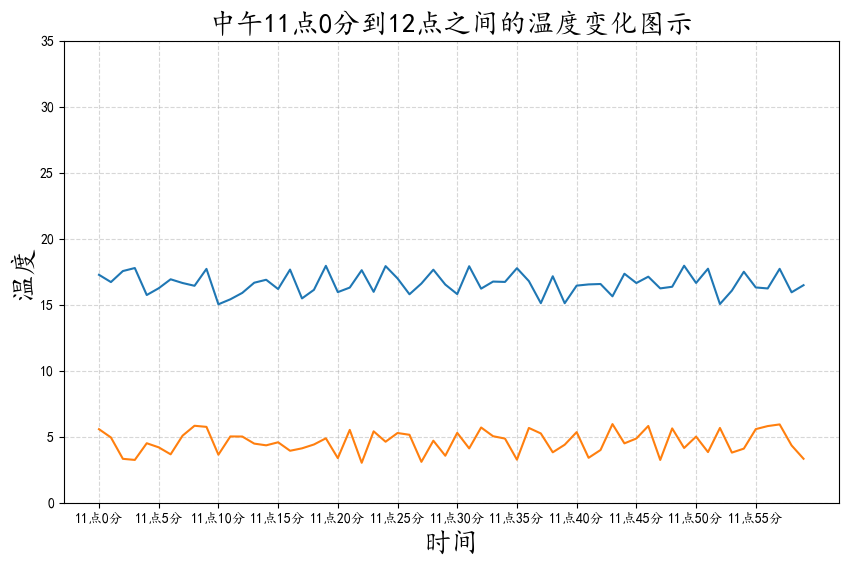

In [35]:
import matplotlib.pyplot as plt
import random

"""准备数据"""
x = range(60)  # 创建0-60的列表（不包括60
y = [random.uniform(15, 18) for i in x] # uniform(a, b)随机生成一个a-b间的一个数；
y1 = [random.uniform(3,6) for i in x ]

plt.figure(figsize=(10, 6), dpi=100) 
plt.plot(x, y)
plt.plot(x, y1)
#plt.plot(x, y, 'r')  # 'r'红色 、'y'黄色、'b'蓝色
#plt.plot(x, y, '--')  # '--'虚线、'-'实线、's'方块、'*'星型、'o'圆圈、'^'三角
# plt.plot(x, y1, 'ro--')  # 'ro--'红色圆圈虚线、'g^-'绿色三角实线、'b-.'蓝色点实线

#"""2.1 添加x y轴刻度"""
# 构造x，y轴刻度标签
x_ticks_label = ["11点{}分".format(i) for i in x]
y_ticks = range(40)
# 修改x,y轴刻度显示，使其间隔为5(x[::]表示步长为5)
plt.xticks(x[::5], x_ticks_label[::5])
plt.yticks(y_ticks[::5])

#"""2.2 添加网格显示(linestyle是每个线条样式，alpha是线条透明度)"""
plt.grid(True, linestyle='--', alpha=0.5)
        
#"""2.3 添加描述信息"""
plt.xlabel('时间', fontsize=20)
plt.ylabel('温度', fontsize=20)
plt.title('中午11点0分到12点之间的温度变化图示', fontsize=20)
         
#"""3. 保存图像(这一步必须在show前面，因为show会释放资源"""
         
#"""4. 显示图像""" 
plt.show()

![方法图](https://matplotlib.org/stable/_images/anatomy.png)

### 3 在一个图里绘制多个坐标系  
方式一：figure的add_subplot

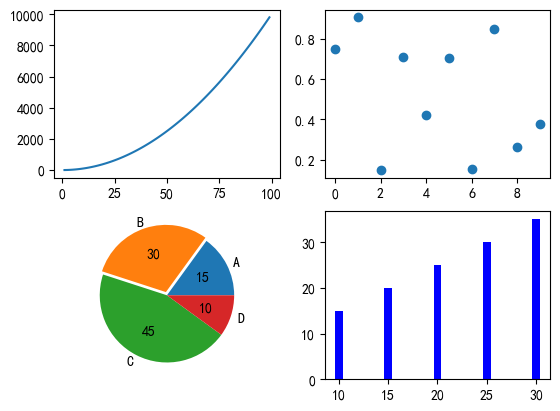

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fig=plt.figure()
# 画第1个图：折线图
x=np.arange(1,100)
ax1=fig.add_subplot(221)
ax1.plot(x,x*x)

# 画第2个图：散点图
ax2=fig.add_subplot(222)
ax2.scatter(np.arange(0,10), np.random.rand(10))
 # 画第3个图：饼图
ax3=fig.add_subplot(223)
ax3.pie(x=[15,30,45,10],labels=list('ABCD'),autopct='%.0f',explode=[0,0.05,0,0])
# 画第4个图：条形图
ax4=fig.add_subplot(224)
ax4.bar([20,10,30,25,15],[25,15,35,30,20],color='b')
plt.show()

方式二：plt的subplot


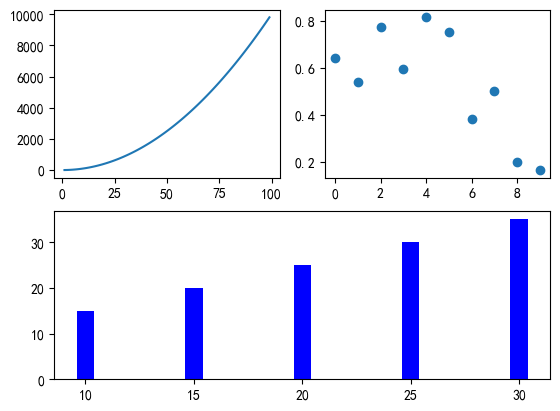

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fig = plt.figure()
# 画第1个图：折线图
x=np.arange(1,100)
plt.subplot(221)
plt.plot(x,x*x)
#画第2个图：散点图
plt.subplot(222)
plt.scatter(np.arange(0,10), np.random.rand(10))
#画第3个图：条形图
#前面的两个图占了221和222的位置，如果想在下面只放一个图，得把前两个当成一列，即2行1列第2个位置
plt.subplot(212)
plt.bar([20,10,30,25,15],[25,15,35,30,20],color='b')
plt.show()

方式三：plt的subplots

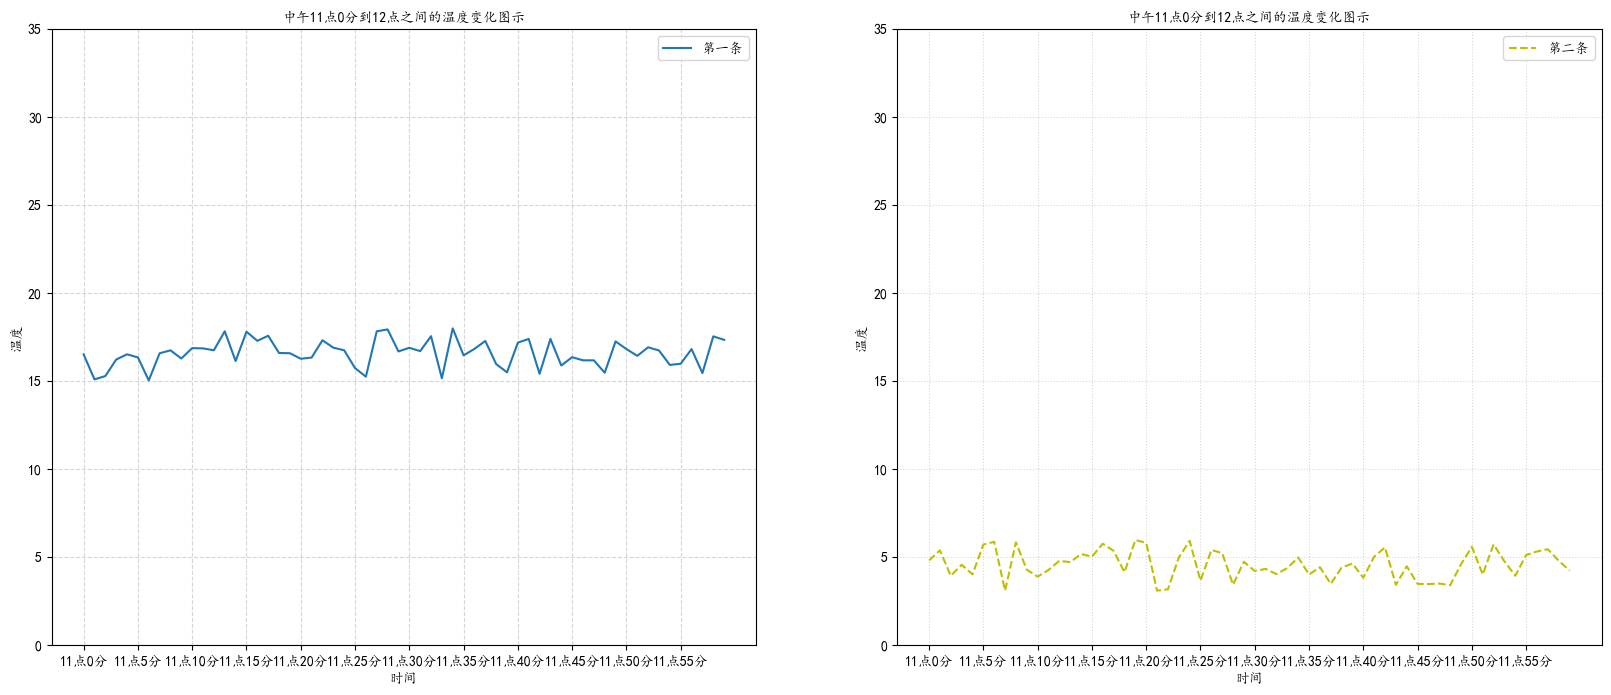

In [40]:
import matplotlib.pyplot as plt
import random
x = range(60)
y1 = [random.uniform(15, 18) for i in x]
y2 = [random.uniform(3, 6) for i in x]
# 1. 创建画布。要绘制1行2列个坐标系，返回fig 画布，axes 坐标系列表。
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(20, 8), dpi=100)
# 2. 绘制图像。【如果是4个，就用axes[0][0],axes[0][1]表示第一行第一列和第二列图像】
axes[0].plot(x, y1, label="第一条")
axes[1].plot(x, y2, color='y', linestyle='--', label="第二条")
axes[0].legend(loc='best')
axes[1].legend(loc='best')
# 2.1 构造xy轴刻度
x_ticks_label = ["11点{}分".format(i) for i in x]
y_ticks = range(40)
# 2.2 设置xy轴刻度，使其每个刻度间隔为5
axes[0].set_xticks(x[::5]) # 这是真实的x轴刻度
axes[0].set_yticks(y_ticks[::5]) # 这是真实的y轴刻度
axes[0].set_xticklabels(x_ticks_label[::5]) # 这是每个真实x轴刻度对应的标签值
# 这是第二个坐标系
axes[1].set_xticks(x[::5])
axes[1].set_yticks(y_ticks[::5])
axes[1].set_xticklabels(x_ticks_label[::5])
# 2.3 添加网格
axes[0].grid(True, linestyle='--', alpha=0.5)
axes[1].grid(True, linestyle=':', alpha=0.5)
# 2.5 添加描述信息
axes[0].set_xlabel("时间")
axes[0].set_ylabel("温度")
axes[0].set_title("中午11点0分到12点之间的温度变化图示", fontsize=10)
axes[1].set_xlabel("时间")
axes[1].set_ylabel("温度")
axes[1].set_title("中午11点0分到12点之间的温度变化图示", fontsize=10)
# 2.6 图像保存
#plt.savefig('temp.png')
# 2.7 图像显示

plt.show()

总结：
1.plt用于绘制单个画布（只有一个坐标）  
plt有很多方法  
eq:1.设置画布  
plt.figure  


In [42]:
dir(plt)

['Annotation',
 'Arrow',
 'Artist',
 'AutoLocator',
 'Axes',
 'Button',
 'Circle',
 'Figure',
 'FigureCanvasBase',
 'FixedFormatter',
 'FixedLocator',
 'FormatStrFormatter',
 'Formatter',
 'FuncFormatter',
 'GridSpec',
 'IndexLocator',
 'Line2D',
 'LinearLocator',
 'Locator',
 'LogFormatter',
 'LogFormatterExponent',
 'LogFormatterMathtext',
 'LogLocator',
 'MaxNLocator',
 'MouseButton',
 'MultipleLocator',
 'Normalize',
 'NullFormatter',
 'NullLocator',
 'Number',
 'PolarAxes',
 'Polygon',
 'Rectangle',
 'ScalarFormatter',
 'Slider',
 'Subplot',
 'SubplotSpec',
 'Text',
 'TickHelper',
 'Widget',
 '_INSTALL_FIG_OBSERVER',
 '_IP_REGISTERED',
 '_IoffContext',
 '_IonContext',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_api',
 '_auto_draw_if_interactive',
 '_backend_mod',
 '_copy_docstring_and_deprecators',
 '_get_required_interactive_framework',
 '_interactive_bk',
 '_log',
 '_pylab_helpers',
 '_setup_pyplot_info_doc